In [81]:
import os
import pandas as pd
from datetime import date
from datetime import timedelta
import tweepy

from config import consumer_key
from config import consumer_secret
from config import access_token
from config import access_token_secret
from config import token

In [82]:
# RECENT TWEET COUNT ======================================================

# Twitter API Bearer Token.
token = token 

# Query Tweets that include gas and oil.
query = "gas oil -is:retweet"
client = tweepy.Client(bearer_token=token)

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth)

In [83]:
# Get count of recent tweets related to query in the last day.
counts = client.get_recent_tweets_count(query=query, granularity='day')
counts

Response(data=[{'end': '2022-12-13T00:00:00.000Z', 'start': '2022-12-12T20:24:54.000Z', 'tweet_count': 1053}, {'end': '2022-12-14T00:00:00.000Z', 'start': '2022-12-13T00:00:00.000Z', 'tweet_count': 5479}, {'end': '2022-12-15T00:00:00.000Z', 'start': '2022-12-14T00:00:00.000Z', 'tweet_count': 6083}, {'end': '2022-12-16T00:00:00.000Z', 'start': '2022-12-15T00:00:00.000Z', 'tweet_count': 5252}, {'end': '2022-12-17T00:00:00.000Z', 'start': '2022-12-16T00:00:00.000Z', 'tweet_count': 4949}, {'end': '2022-12-18T00:00:00.000Z', 'start': '2022-12-17T00:00:00.000Z', 'tweet_count': 3722}, {'end': '2022-12-19T00:00:00.000Z', 'start': '2022-12-18T00:00:00.000Z', 'tweet_count': 3608}, {'end': '2022-12-19T20:24:54.000Z', 'start': '2022-12-19T00:00:00.000Z', 'tweet_count': 4109}], includes={}, errors=[], meta={'total_tweet_count': 34255})

In [84]:
Lst = []

for i in counts.data:
    Dict = {}
    Dict['Day'] = str(i["start"][0:10])
    Dict['Tweet Count'] = i["tweet_count"]
    Lst.append(Dict)
Lst

[{'Day': '2022-12-12', 'Tweet Count': 1053},
 {'Day': '2022-12-13', 'Tweet Count': 5479},
 {'Day': '2022-12-14', 'Tweet Count': 6083},
 {'Day': '2022-12-15', 'Tweet Count': 5252},
 {'Day': '2022-12-16', 'Tweet Count': 4949},
 {'Day': '2022-12-17', 'Tweet Count': 3722},
 {'Day': '2022-12-18', 'Tweet Count': 3608},
 {'Day': '2022-12-19', 'Tweet Count': 4109}]

In [85]:
# Change to dataframe.
df = pd.DataFrame(Lst)
df = pd.DataFrame.from_dict(Lst)
df = pd.DataFrame.from_records(Lst)
df = df.rename(columns={"Day": "Date"})
df['Date'] = pd.to_datetime(df['Date'])

# Locate today's count.
update_df = df.iloc[-2:-1]

update_df

,Date,Tweet Count
6,2022-12-18,3608


In [86]:
# Open previous data.
tweet_count = pd.read_csv("../Resources/data/tweet_count.csv")
tweet_count = tweet_count.rename(columns={"d": "Date"})
tweet_count['Date'] = pd.to_datetime(tweet_count['Date'])
tweet_count = tweet_count.drop(columns=['Unnamed: 0'])
tweet_count

,Date,Tweet Count
0,2022-11-23,5665
1,2022-11-24,4852
2,2022-11-25,4282
3,2022-11-26,3856
4,2022-11-27,3898
5,2022-11-28,5089
6,2022-11-29,6413
7,2022-11-30,7249
8,2022-12-01,5941
9,2022-12-02,5273


In [87]:
# Add today's data to previous data.
tweet_count = pd.concat([tweet_count, update_df], ignore_index = True)
tweet_count

,Date,Tweet Count
0,2022-11-23,5665
1,2022-11-24,4852
2,2022-11-25,4282
3,2022-11-26,3856
4,2022-11-27,3898
5,2022-11-28,5089
6,2022-11-29,6413
7,2022-11-30,7249
8,2022-12-01,5941
9,2022-12-02,5273


In [88]:
tweet_count.drop_duplicates(subset=["Date"],inplace=True)
tweet_count

,Date,Tweet Count
0,2022-11-23,5665
1,2022-11-24,4852
2,2022-11-25,4282
3,2022-11-26,3856
4,2022-11-27,3898
5,2022-11-28,5089
6,2022-11-29,6413
7,2022-11-30,7249
8,2022-12-01,5941
9,2022-12-02,5273


In [89]:
# Save updated data to csv.
tweet_count.to_csv('../Resources/data/tweet_count.csv')

# Convert tweet counts dataframe to dictionary.
tweet_count.index = tweet_count.index.map(str)
tweet_dict = tweet_count.to_dict()
tweet_dict

{'Date': {'0': Timestamp('2022-11-23 00:00:00'),
  '1': Timestamp('2022-11-24 00:00:00'),
  '2': Timestamp('2022-11-25 00:00:00'),
  '3': Timestamp('2022-11-26 00:00:00'),
  '4': Timestamp('2022-11-27 00:00:00'),
  '5': Timestamp('2022-11-28 00:00:00'),
  '6': Timestamp('2022-11-29 00:00:00'),
  '7': Timestamp('2022-11-30 00:00:00'),
  '8': Timestamp('2022-12-01 00:00:00'),
  '9': Timestamp('2022-12-02 00:00:00'),
  '10': Timestamp('2022-12-03 00:00:00'),
  '11': Timestamp('2022-12-04 00:00:00'),
  '12': Timestamp('2022-12-05 00:00:00'),
  '13': Timestamp('2022-12-06 00:00:00'),
  '14': Timestamp('2022-12-07 00:00:00'),
  '15': Timestamp('2022-12-08 00:00:00'),
  '16': Timestamp('2022-12-09 00:00:00'),
  '17': Timestamp('2022-12-10 00:00:00'),
  '18': Timestamp('2022-12-11 00:00:00'),
  '19': Timestamp('2022-12-12 00:00:00'),
  '20': Timestamp('2022-12-13 00:00:00'),
  '21': Timestamp('2022-12-14 00:00:00'),
  '22': Timestamp('2022-12-15 00:00:00'),
  '23': Timestamp('2022-12-16 00:00:

In [90]:
# RECENT TWEETS ======================================================
from datetime import datetime
from datetime import timezone
# Get today's date and tomorrow's date to run time frame for today.
day1 = date.today()
day2 = day1 - timedelta(days = 1)
day1 = str(day1)
day2 = str(day2)


# Scrape Twitter for all tweets related to query (this might take a minute).
start = day2 + 'T00:00:00.000Z'
end = day1 + 'T00:00:00.00Z'
(start,end)

('2022-12-18T00:00:00.000Z', '2022-12-19T00:00:00.00Z')

In [91]:
tweets_list = []

In [92]:
tweets = tweepy.Paginator(client.search_recent_tweets, query=query,
                            tweet_fields=['context_annotations', 'created_at'],
                            start_time=start, 
                            end_time=end,
                            max_results=10).flatten(limit=10)

In [93]:
for tweet in tweets:
    tweets_list.append(tweet)
tweets_list

[<Tweet id=1604627526827257856 text='Fire under control at unit of Siberian oil and gas condensate field #FMTNews https://t.co/YsAXadFVuj'>,
 <Tweet id=1604627129815240706 text='¡Oil &amp; Gas Reporter está disponible! https://t.co/6BCpGsGo6C Gracias a @WorldOil #oilandgas #upstream'>,
 <Tweet id=1604627009321275393 text='@ShellenbergerMD @AndrewThereIn We need more #Oil &amp; #Gas than ever Preventing Oil&amp; Gas Exploration or any Shale Gas Operation will result in higher prices long term. 85% of Households in UK have a #GasBoiler 85% of us own a #PetrolorDieselCar Yet we all are in denial of Oil&amp;Gas Why ? @Heid_oil @zakmir @ElSenala'>,
 <Tweet id=1604626526691024897 text='“But China will just keep buying Russian oil and gas”\n\nHm. Maybe not so much… https://t.co/xPm9UULmhr'>,
 <Tweet id=1604626482378047489 text="@ClimateBen if we can't get people to wear a mask, how are we going to get them to actually spend money to get to create enough renewable energy infrastructure.  the g

In [94]:
recent_tweets_df = pd.DataFrame({'Date': pd.Series(dtype='str'),
                   'Tweet_ID': pd.Series(dtype='str'),
                   'Text': pd.Series(dtype='str')})
for item in tweets_list:
    recent_tweets_df = recent_tweets_df.append({
        'Date': item.created_at,
        'Tweet_ID': item.id,
        'Text': item.text
    }, ignore_index = True)

recent_tweets_df

,Date,Tweet_ID,Text
0,2022-12-18 23:59:49+00:00,1604627526827257856,Fire under control at unit of Siberian oil and...
1,2022-12-18 23:58:14+00:00,1604627129815240706,¡Oil &amp; Gas Reporter está disponible! https...
2,2022-12-18 23:57:46+00:00,1604627009321275393,@ShellenbergerMD @AndrewThereIn We need more #...
3,2022-12-18 23:55:51+00:00,1604626526691024897,“But China will just keep buying Russian oil a...
4,2022-12-18 23:55:40+00:00,1604626482378047489,@ClimateBen if we can't get people to wear a m...
5,2022-12-18 23:54:13+00:00,1604626117989629952,"""It was these specific circumstances that allo..."
6,2022-12-18 23:53:47+00:00,1604626006635122688,@SamRamani2 And watching in the wings are Turk...
7,2022-12-18 23:53:32+00:00,1604625944043556867,@terrychristian What are you on about? Do you ...
8,2022-12-18 23:53:10+00:00,1604625853651959808,@LPNational When you rail against the governme...
9,2022-12-18 23:53:07+00:00,1604625841538977793,@1stonestruck @KDRandBear @RonFilipkowski @Flo...


In [95]:
len(recent_tweets_df)

10

In [96]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Initiate headless driver for deployment
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True)

In [97]:
def get_embed_code(tweet_id, browser):
    try:
        url='https://publish.twitter.com/#'
        browser.visit(url)

        # Delay for loading the page
        browser.is_element_present_by_css('div.list_text', wait_time=1)
    except BaseException:
        return None
    
    #Find query form and fill it in with twe
    query_form = browser.find_by_id('configuration-query').first
    query_form.fill('https://twitter.com/twitter/statuses/'+str(tweet_id))
    
    browser.find_by_tag('button').first.click()
    return browser.find_by_tag('code').first.text

In [98]:
recent_tweets_df['test'] = recent_tweets_df['Tweet_ID'].apply(get_embed_code, browser=browser )
recent_tweets_df

,Date,Tweet_ID,Text,test
0,2022-12-18 23:59:49+00:00,1604627526827257856,Fire under control at unit of Siberian oil and...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
1,2022-12-18 23:58:14+00:00,1604627129815240706,¡Oil &amp; Gas Reporter está disponible! https...,"<blockquote class=""twitter-tweet""><p lang=""es""..."
2,2022-12-18 23:57:46+00:00,1604627009321275393,@ShellenbergerMD @AndrewThereIn We need more #...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
3,2022-12-18 23:55:51+00:00,1604626526691024897,“But China will just keep buying Russian oil a...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
4,2022-12-18 23:55:40+00:00,1604626482378047489,@ClimateBen if we can't get people to wear a m...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
5,2022-12-18 23:54:13+00:00,1604626117989629952,"""It was these specific circumstances that allo...","<blockquote class=""twitter-tweet""><p lang=""en""..."
6,2022-12-18 23:53:47+00:00,1604626006635122688,@SamRamani2 And watching in the wings are Turk...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
7,2022-12-18 23:53:32+00:00,1604625944043556867,@terrychristian What are you on about? Do you ...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
8,2022-12-18 23:53:10+00:00,1604625853651959808,@LPNational When you rail against the governme...,"<blockquote class=""twitter-tweet""><p lang=""en""..."
9,2022-12-18 23:53:07+00:00,1604625841538977793,@1stonestruck @KDRandBear @RonFilipkowski @Flo...,"<blockquote class=""twitter-tweet""><p lang=""en""..."


In [99]:
browser.quit()

In [100]:
recent_tweets_df.index = recent_tweets_df.index.map(str)
transposed_tweets_dict = recent_tweets_df.to_dict()
transposed_tweets_dict

{'Date': {'0': Timestamp('2022-12-18 23:59:49+0000', tz='UTC'),
  '1': Timestamp('2022-12-18 23:58:14+0000', tz='UTC'),
  '2': Timestamp('2022-12-18 23:57:46+0000', tz='UTC'),
  '3': Timestamp('2022-12-18 23:55:51+0000', tz='UTC'),
  '4': Timestamp('2022-12-18 23:55:40+0000', tz='UTC'),
  '5': Timestamp('2022-12-18 23:54:13+0000', tz='UTC'),
  '6': Timestamp('2022-12-18 23:53:47+0000', tz='UTC'),
  '7': Timestamp('2022-12-18 23:53:32+0000', tz='UTC'),
  '8': Timestamp('2022-12-18 23:53:10+0000', tz='UTC'),
  '9': Timestamp('2022-12-18 23:53:07+0000', tz='UTC')},
 'Tweet_ID': {'0': 1604627526827257856,
  '1': 1604627129815240706,
  '2': 1604627009321275393,
  '3': 1604626526691024897,
  '4': 1604626482378047489,
  '5': 1604626117989629952,
  '6': 1604626006635122688,
  '7': 1604625944043556867,
  '8': 1604625853651959808,
  '9': 1604625841538977793},
 'Text': {'0': 'Fire under control at unit of Siberian oil and gas condensate field #FMTNews https://t.co/YsAXadFVuj',
  '1': '¡Oil &amp; 

In [101]:
test = recent_tweets_df.to_dict('records')
test

[{'Date': Timestamp('2022-12-18 23:59:49+0000', tz='UTC'),
  'Tweet_ID': 1604627526827257856,
  'Text': 'Fire under control at unit of Siberian oil and gas condensate field #FMTNews https://t.co/YsAXadFVuj',
  'test': '<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Fire under control at unit of Siberian oil and gas condensate field <a href="https://twitter.com/hashtag/FMTNews?src=hash&amp;ref_src=twsrc%5Etfw">#FMTNews</a> <a href="https://t.co/YsAXadFVuj">https://t.co/YsAXadFVuj</a></p>&mdash; Free Malaysia Today (@fmtoday) <a href="https://twitter.com/fmtoday/status/1604627526827257856?ref_src=twsrc%5Etfw">December 18, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'},
 {'Date': Timestamp('2022-12-18 23:58:14+0000', tz='UTC'),
  'Tweet_ID': 1604627129815240706,
  'Text': '¡Oil &amp; Gas Reporter está disponible! https://t.co/6BCpGsGo6C Gracias a @WorldOil #oilandgas #upstream',
  'test': '<blockquote class="twitter-

In [102]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [103]:
recent_tweets_df['Sentiment_Score'] = recent_tweets_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
recent_tweets_df

,Date,Tweet_ID,Text,test,Sentiment_Score
0,2022-12-18 23:59:49+00:00,1604627526827257856,Fire under control at unit of Siberian oil and...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
1,2022-12-18 23:58:14+00:00,1604627129815240706,¡Oil &amp; Gas Reporter está disponible! https...,"<blockquote class=""twitter-tweet""><p lang=""es""...",0.000000
2,2022-12-18 23:57:46+00:00,1604627009321275393,@ShellenbergerMD @AndrewThereIn We need more #...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.325000
3,2022-12-18 23:55:51+00:00,1604626526691024897,“But China will just keep buying Russian oil a...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
4,2022-12-18 23:55:40+00:00,1604626482378047489,@ClimateBen if we can't get people to wear a m...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
5,2022-12-18 23:54:13+00:00,1604626117989629952,"""It was these specific circumstances that allo...","<blockquote class=""twitter-tweet""><p lang=""en""...",0.175000
6,2022-12-18 23:53:47+00:00,1604626006635122688,@SamRamani2 And watching in the wings are Turk...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
7,2022-12-18 23:53:32+00:00,1604625944043556867,@terrychristian What are you on about? Do you ...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
8,2022-12-18 23:53:10+00:00,1604625853651959808,@LPNational When you rail against the governme...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000
9,2022-12-18 23:53:07+00:00,1604625841538977793,@1stonestruck @KDRandBear @RonFilipkowski @Flo...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.071429


In [104]:
def score_transform(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'
recent_tweets_df['Polarity'] = recent_tweets_df['Sentiment_Score'].apply(score_transform)
recent_tweets_df                                                                 

,Date,Tweet_ID,Text,test,Sentiment_Score,Polarity
0,2022-12-18 23:59:49+00:00,1604627526827257856,Fire under control at unit of Siberian oil and...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
1,2022-12-18 23:58:14+00:00,1604627129815240706,¡Oil &amp; Gas Reporter está disponible! https...,"<blockquote class=""twitter-tweet""><p lang=""es""...",0.000000,Neutral
2,2022-12-18 23:57:46+00:00,1604627009321275393,@ShellenbergerMD @AndrewThereIn We need more #...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.325000,Positive
3,2022-12-18 23:55:51+00:00,1604626526691024897,“But China will just keep buying Russian oil a...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
4,2022-12-18 23:55:40+00:00,1604626482378047489,@ClimateBen if we can't get people to wear a m...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
5,2022-12-18 23:54:13+00:00,1604626117989629952,"""It was these specific circumstances that allo...","<blockquote class=""twitter-tweet""><p lang=""en""...",0.175000,Positive
6,2022-12-18 23:53:47+00:00,1604626006635122688,@SamRamani2 And watching in the wings are Turk...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
7,2022-12-18 23:53:32+00:00,1604625944043556867,@terrychristian What are you on about? Do you ...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
8,2022-12-18 23:53:10+00:00,1604625853651959808,@LPNational When you rail against the governme...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.000000,Neutral
9,2022-12-18 23:53:07+00:00,1604625841538977793,@1stonestruck @KDRandBear @RonFilipkowski @Flo...,"<blockquote class=""twitter-tweet""><p lang=""en""...",0.071429,Neutral


In [108]:
recent_tweets_df.index = recent_tweets_df.index.map(str)
recent_tweets_df['Date'] = recent_tweets_df['Date'].map(str)
recent_tweets_df['Sentiment_Score  '] = recent_tweets_df['Sentiment_Score  '].map(str)
recent_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             10 non-null     object 
 1   Tweet_ID         10 non-null     object 
 2   Text             10 non-null     object 
 3   test             10 non-null     object 
 4   Sentiment_Score  10 non-null     float64
 5   Polarity         10 non-null     object 
dtypes: float64(1), object(5)
memory usage: 560.0+ bytes


In [80]:
recent_tweets_df.index = recent_tweets_df.index.map(str)
transposed_tweets_dict = recent_tweets_df.to_dict('records')
transposed_tweets_dict

[{'Date': Timestamp('2022-12-18 23:59:49+0000', tz='UTC'),
  'Tweet_ID': 1604627526827257856,
  'Text': 'Fire under control at unit of Siberian oil and gas condensate field #FMTNews https://t.co/YsAXadFVuj',
  'test': '<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Fire under control at unit of Siberian oil and gas condensate field <a href="https://twitter.com/hashtag/FMTNews?src=hash&amp;ref_src=twsrc%5Etfw">#FMTNews</a> <a href="https://t.co/YsAXadFVuj">https://t.co/YsAXadFVuj</a></p>&mdash; Free Malaysia Today (@fmtoday) <a href="https://twitter.com/fmtoday/status/1604627526827257856?ref_src=twsrc%5Etfw">December 18, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>',
  'Sentiment_Score': 0.0,
  'Polarity': 'Neutral'},
 {'Date': Timestamp('2022-12-18 23:58:14+0000', tz='UTC'),
  'Tweet_ID': 1604627129815240706,
  'Text': '¡Oil &amp; Gas Reporter está disponible! https://t.co/6BCpGsGo6C Gracias a @WorldOil #oilandgas

In [80]:
# Gas & Oil Linear Regression Model
import os
import numpy as np
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import date


In [86]:
hist_gas_df = pd.read_csv("Resources/data/ML_gas_price.csv")
hist_gas_df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [88]:
hist_gas_df = hist_gas_df[['Date', 'R1', 'D1']]
hist_gas_df

,Date,R1,D1
0,01/02/1995,1.079,1.104
1,01/09/1995,1.086,1.102
2,01/16/1995,1.078,1.100
3,01/23/1995,1.083,1.095
4,01/30/1995,1.083,1.090
...,...,...,...
1356,12/28/2020,2.243,2.635
1357,01/04/2021,2.249,2.640
1358,01/11/2021,2.317,2.670
1359,01/18/2021,2.379,2.696


In [95]:
hist_gas_df['Date'] = pd.to_datetime(hist_gas_df['Date'])
hist_gas_df

C:\Users\Baldo\anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,R1,D1
0,1995-01-02,1.079,1.104
1,1995-01-09,1.086,1.102
2,1995-01-16,1.078,1.100
3,1995-01-23,1.083,1.095
4,1995-01-30,1.083,1.090
...,...,...,...
1356,2020-12-28,2.243,2.635
1357,2021-01-04,2.249,2.640
1358,2021-01-11,2.317,2.670
1359,2021-01-18,2.379,2.696


In [102]:
crude_df = pd.read_csv("Resources/data/ML_crude_price.csv")
crude_df

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.2700,NaN,NaN
1,1983-04-04T00:00:00,30.6300,4.646396,1.3600
2,1983-05-02T00:00:00,30.2500,-1.240614,-0.3800
3,1983-06-01T00:00:00,31.3800,3.735537,1.1300
4,1983-07-01T00:00:00,32.0000,1.975781,0.6200
...,...,...,...,...
470,2022-05-02T00:00:00,111.9100,8.713814,8.9700
471,2022-06-01T00:00:00,103.1000,-7.872397,-8.8100
472,2022-07-01T00:00:00,96.7500,-6.159069,-6.3500
473,2022-08-01T00:00:00,89.0300,-7.979328,-7.7200


In [103]:
# Dropping percent change and change of crude oil prices
crude_df = crude_df[['date', 'price']]
crude_df

,date,price
0,1983-03-30T00:00:00,29.2700
1,1983-04-04T00:00:00,30.6300
2,1983-05-02T00:00:00,30.2500
3,1983-06-01T00:00:00,31.3800
4,1983-07-01T00:00:00,32.0000
...,...,...
470,2022-05-02T00:00:00,111.9100
471,2022-06-01T00:00:00,103.1000
472,2022-07-01T00:00:00,96.7500
473,2022-08-01T00:00:00,89.0300


In [104]:
crude_df['date'] = pd.to_datetime(crude_df['date'])
crude_df

C:\Users\Baldo\anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,price
0,1983-03-30,29.2700
1,1983-04-04,30.6300
2,1983-05-02,30.2500
3,1983-06-01,31.3800
4,1983-07-01,32.0000
...,...,...
470,2022-05-02,111.9100
471,2022-06-01,103.1000
472,2022-07-01,96.7500
473,2022-08-01,89.0300


In [108]:
crude_df = crude_df[(crude_df['date'] > pd.Timestamp(year=1994, month=12, day=31)) & \
                   (crude_df['date'] < pd.Timestamp(year=2022, month=1, day=1))]
crude_df

,date,price
142,1995-01-03,18.39
143,1995-02-01,18.49
144,1995-03-01,19.17
145,1995-04-03,20.38
146,1995-05-01,18.89
...,...,...
461,2021-08-02,68.50
462,2021-09-01,75.03
463,2021-10-01,81.78
464,2021-11-01,65.85


In [150]:
# Gas & Oil Linear Regression Model
import os
import numpy as np
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Description of Preliminary Data Preprocessing
# Starting with crude oil data (1983 to present) and gas and diesel price data (1995 to 2021), the data are cleaned to fit into a linear regression machine learning model.
# Below the data are loaded into two dataframes (gas_df and crude_df). The cleaned gas price dataframe includes all formulations of retail gasoline and diesel prices in a MM/DD/YYYY format with samples from each month starting in January 1995 to January 2021. The cleaned crude oil dataframe is in the same format as the cleaned gas price dataframe: MM/DD/YYYY format with monthly samples from January 1995 to January 2021.
## Data Examining & Cleaning 

hist_gas_df = pd.read_csv("Resources/data/ML_gas_price.csv")

#A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
#A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
#A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
#R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
#R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
#R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
#M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
#M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
#M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
#P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
#P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
#P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
#D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)

# Dropping conventional and reformulated retail gas prices as well as all, mid-grade, and premium
hist_gas_df['date'] = hist_gas_df['Date']
hist_gas_df = hist_gas_df[['date', 'R1', 'M1', 'P1', 'D1']]

crude_df = pd.read_csv("Resources/data/ML_crude_price.csv")

# Dropping percent change and change of crude oil prices
crude_df = crude_df[['date', 'price']]

# Formatting crude_df to match hist_gas_df date format
from datetime import date
def fix_date(bad_date):
    bad_date = str(bad_date)
    year, month, day = bad_date.split('-')
    day = day[0:2]
    return date(int(year), int(month), int(day))

crude_df['date'] = crude_df['date'].apply(fix_date) 

# Dropping 1983-1994 from crude_df
cuttoff_date = date(1994, 12, 31)
crude_df = crude_df.loc[crude_df['date'] > cuttoff_date]

# Lining up months and years in crude_df and gas_df
def date2str(dt):
    return dt.strftime('%m/%Y')

def drop_month(dt):
    month, day, year = dt.split('/')
    return f"{month}/{year}"

crude_df['date'] = crude_df['date'].apply(date2str)
hist_gas_df['date'] = hist_gas_df['date'].apply(drop_month)

# Omit 2022 data 
crude_df = crude_df.loc[0:454]

# Keep only first Month/Year instance for gas_df
seen_dates = set()
indices_to_remove = []
for idx, row in hist_gas_df.iterrows():
    _date = row['date']
    if _date in seen_dates:
        indices_to_remove.append(idx)
    else:
        seen_dates.add(_date)
hist_gas_df.drop(indices_to_remove, inplace=True)



In [143]:
# Linear Regression Machine Learning Model

## Description of Preliminary Feature Engineering and Preliminary Feature Selection
# To fit a linear regression model with crude oil and gas price data to establish and explore relationships between the data.

# Explanation of Model Choice, including Limitations and Benefits 
# This linear regression model is the best model because historically, crude oil prices and gas prices have a linear relationship, so there is no need to complicate the relationship with other, more complex models.

# X = crude oil price [=] 1/barrel
# Y = gas price [=] 1/gallon
import numpy as np

X = np.array(crude_df['price'])
Y = hist_gas_df['R1'].to_numpy()

## Train, Test, Split Description 
# The data are split into 80% training and 20% testing.

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# R-squared (how much of the outcome is predicted correctly by the model) with training data
r_2_train = lin_reg_model.score(X_train, y_train)
r_2_train


0.9030569650034823

In [184]:
X

array([ 18.39  ,  18.49  ,  19.17  ,  20.38  ,  18.89  ,  17.4   ,
        17.56  ,  17.84  ,  17.54  ,  17.64  ,  18.18  ,  19.55  ,
        17.74  ,  19.54  ,  21.47  ,  21.2   ,  19.76  ,  20.92  ,
        20.42  ,  22.25  ,  24.38  ,  23.35  ,  23.75  ,  25.92  ,
        24.15  ,  20.3   ,  20.41  ,  20.21  ,  20.88  ,  19.8   ,
        20.14  ,  19.61  ,  21.18  ,  21.08  ,  19.15  ,  17.64  ,
        17.21  ,  15.44  ,  15.61  ,  15.39  ,  15.2   ,  14.18  ,
        14.21  ,  13.34  ,  16.14  ,  14.42  ,  11.22  ,  12.05  ,
        12.75  ,  12.27  ,  16.76  ,  18.66  ,  16.84  ,  19.29  ,
        20.53  ,  22.11  ,  24.51  ,  21.75  ,  24.59  ,  25.6   ,
        27.64  ,  30.43  ,  26.9   ,  25.74  ,  29.01  ,  32.5   ,
        27.43  ,  33.12  ,  30.84  ,  32.7   ,  33.82  ,  26.8   ,
        28.66  ,  27.39  ,  26.29  ,  28.46  ,  28.37  ,  26.25  ,
        26.35  ,  27.2   ,  23.43  ,  21.18  ,  19.44  ,  19.84  ,
        19.48  ,  21.74  ,  26.31  ,  27.29  ,  25.31  ,  26.8

In [145]:
import pickle
pickle.dump(lin_reg_model, open('Resources/data/lin_reg_model.sav', 'wb'))

C:\Users\Baldo\anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


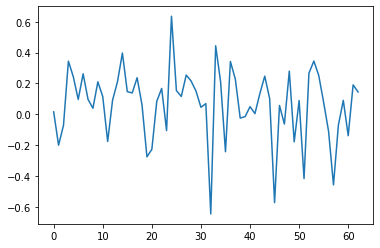

In [146]:
from matplotlib import pyplot as plt

predictions = lin_reg_model.predict(X_test)
r_2_test = lin_reg_model.score(X_test, y_test)
diffs = [0]*len(y_test)
for (pred, real, idx) in zip(predictions, y_test, range(len(y_test))):
    diffs[idx] = pred - real

# Plot of difference of real data from best fit line 
fig, ax = plt.subplots()
ax.plot(diffs)
fig.show()

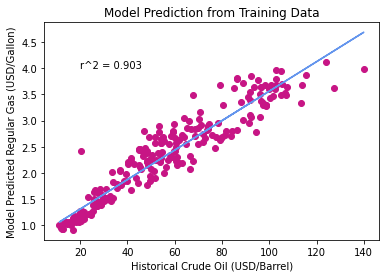

In [148]:
# Visualizations
# Training Data Vis
plt.scatter(X_train, y_train, color = "mediumvioletred")
plt.plot(X_train, lin_reg_model.predict(X_train), color = "cornflowerblue")
plt.title("Model Prediction from Training Data")
plt.xlabel("Historical Crude Oil (USD/Barrel)")
plt.ylabel("Model Predicted Regular Gas (USD/Gallon)")
plt.text(20, 4.0, f"r^2 = {r_2_train:.3f}")
plt.savefig("Resources/images/training_fig.png")

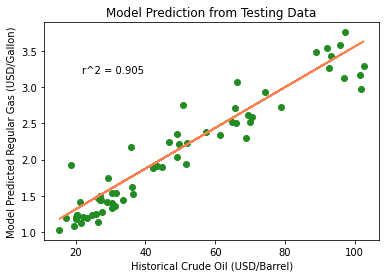

In [149]:
# Test Data Vis
plt.scatter(X_test, y_test, color = "forestgreen")
plt.plot(X_test, lin_reg_model.predict(X_test), color = "coral")
plt.title("Model Prediction from Testing Data")
plt.xlabel("Historical Crude Oil (USD/Barrel)")
plt.ylabel("Model Predicted Regular Gas (USD/Gallon)")
plt.text(22, 3.2, f"r^2 = {r_2_test:.3f}")
plt.savefig("Resources/images/testing_fig.png")

In [153]:
# Import Dependencies
from bs4 import BeautifulSoup,Comment
import numpy as np
import pandas as pd
import requests
import datetime

In [154]:
request_headers = {
        'accept':
        'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.8',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/601.3.9'
    }

In [155]:
with requests.Session() as session:
    url = 'https://gasprices.aaa.com/'
    response = session.get(url, headers=request_headers)

    soup = BeautifulSoup(response.content, 'html.parser')
    df = pd.DataFrame()

    html_data = soup.find(class_="table-mob")
    html_data2 = soup.find(class_="average-price")

    date = [span.get_text() for span in html_data2.find_all("span")]
    data = [td.get_text() for td in html_data.find_all("td")]

In [161]:
CurrentDate = []
RegularPrice = []
MidGradePrice = []
PremiumPrice = []
DieselPrice = []
day = pd.to_datetime(date[0][11:])

CurrentDate.append(day)
RegularPrice.append(round(float(data[1][1:]),2))
MidGradePrice.append(round(float(data[2][1:]),2))
PremiumPrice.append(round(float(data[3][1:]),2))
DieselPrice.append(round(float(data[4][1:]),2))

df['Date'] = CurrentDate
df['Regular'] = RegularPrice
df['MidGrade'] = MidGradePrice
df['Premium'] = PremiumPrice
df['Diesel'] = DieselPrice

gas = pd.read_csv("Resources/data/gas-diesel-prices.csv")
gas['Date'] = pd.to_datetime(gas['Date'])
gas = pd.concat([gas, df], ignore_index = True)
gas = gas.drop(columns=['Unnamed: 0'])
gas = gas.drop_duplicates()
gas.to_csv('Resources/data/gas-diesel-prices.csv')

In [164]:
# Oil Prices

with requests.Session() as session:
    url = 'https://www.marketwatch.com/investing/future/cl.1'
    response2 = session.get(url, headers=request_headers)

soup2 = BeautifulSoup(response2.content, 'html.parser')
df2 = pd.DataFrame()

html_data3 = soup2.find('th', attrs={'class':'table__heading'})
html_data4 = soup2.find('td', attrs={'class':'table__cell u-semi'})

html_data3 = html_data3.text.replace('\n    {\n        ','{')
html_data3 = html_data3.replace('\n    }\n    ','}')
html_data4 = html_data4.text.replace('\n    {\n        ','{')
html_data4 = html_data4.replace('\n    }\n    ','}')
pre_date = pd.to_datetime(html_data3[17:])
pre_price = html_data4[1:]

date = []
crude = []
date.append(pre_date)
crude.append(round(float(pre_price),2))
df2["Date"] = date
df2["Crude Closing"] = crude

oil_df = pd.read_csv("Resources/data/oil-prices.csv")
oil_df['Date'] = pd.to_datetime(oil_df['Date'])
oil_df = pd.concat([oil_df, df2], ignore_index = True)
oil_df = oil_df.drop(columns=['Unnamed: 0'])
oil_df = oil_df.drop_duplicates()
oil_df.to_csv('Resources/data/oil-prices.csv')

# Merge DataFrames

oil_gas_df = pd.merge(gas, oil_df, on=["Date", "Date"])

In [179]:
df.iloc[0].to_dict()

{'Date': Timestamp('2022-12-19 00:00:00'),
 'Regular': 3.14,
 'MidGrade': 3.59,
 'Premium': 3.9,
 'Diesel': 4.77}

In [171]:
oil_gas_df.sort_values(by=['Date'], inplace=True)
oil_gas_df

,Date,Regular,Diesel,MidGrade,Premium,Crude Closing
0,2022-02-23,3.54,3.96,NaN,NaN,92.10
1,2022-02-24,3.54,3.96,NaN,NaN,92.81
2,2022-02-25,3.57,3.98,NaN,NaN,91.59
3,2022-02-28,3.61,4.01,NaN,NaN,95.72
4,2022-03-01,3.62,4.02,NaN,NaN,103.41
...,...,...,...,...,...,...
201,2022-12-12,3.26,4.92,NaN,NaN,73.17
202,2022-12-13,3.25,4.89,NaN,NaN,75.39
203,2022-12-14,3.21,4.86,NaN,NaN,77.28
204,2022-12-15,3.19,4.83,NaN,NaN,76.11


In [191]:
test = oil_gas_df.iloc[-1][-1]
test

74.29

In [194]:
# Load trained linear regression models
reg_model = pickle.load(open('Resources/data/reg_model.sav', 'rb'))
mid_model = pickle.load(open('Resources/data/mid_model.sav', 'rb'))
prm_model = pickle.load(open('Resources/data/prm_model.sav', 'rb'))
dsl_model = pickle.load(open('Resources/data/dsl_model.sav', 'rb'))

# Build dictionary with predicted gas prices
prediction = {
    'Regular': reg_model.predict(np.array(test).reshape(1, 1))[0],
    'MidGrade': mid_model.predict(np.array(test).reshape(1, 1))[0],
    'Premium': prm_model.predict(np.array(test).reshape(1, 1))[0],
    'Diesel': dsl_model.predict(np.array(test).reshape(1, 1))[0],
}
prediction

{'Regular': 2.8385840214427445,
 'MidGrade': 3.009229607675631,
 'Premium': 3.159413985254372,
 'Diesel': 3.117356860528639}

In [197]:
# RECENT TWEET COUNT ======================================================

# Twitter API Bearer Token.
api_token = token 

# Query Tweets that include gas and oil.
query = "gas oil -is:retweet"
client = tweepy.Client(bearer_token=api_token)

# Get count of recent tweets related to query in the last day.
counts = client.get_recent_tweets_count(query=query, 
                                        granularity='day')
Lst = []

for i in counts.data:
    Dict = {}
    Dict['Day'] = str(i["start"][0:10])
    Dict['Tweet Count'] = i["tweet_count"]
    Lst.append(Dict)

# Change to dataframe.
df = pd.DataFrame(Lst)
df = pd.DataFrame.from_dict(Lst)
df = pd.DataFrame.from_records(Lst)
df = df.rename(columns={"Day": "Date"})
df['Date'] = pd.to_datetime(df['Date'])

# Locate today's count.
update_df = df.iloc[-2:-1]

# Open previous data.
tweet_count = pd.read_csv("Resources/data/tweet_count.csv")
tweet_count = tweet_count.rename(columns={"d": "Date"})
tweet_count['Date'] = pd.to_datetime(tweet_count['Date'])

# Add today's data to previous data.
tweet_count = pd.concat([tweet_count, update_df], ignore_index = True)

# Save updated data to csv.
tweet_count = tweet_count.drop(columns=['Unnamed: 0'])
tweet_count.drop_duplicates(subset=["Date"],inplace=True)
tweet_count.to_csv('Resources/data/tweet_count.csv')

# Convert tweet counts dataframe to dictionary.
tweet_count.index = tweet_count.index.map(str)
tweet_count_dict = tweet_count.to_dict()


# RECENT TWEETS ======================================================

# Get today's date and tomorrow's date to run time frame for today.
day1 = date.today()
day2 = day1 + timedelta(days = 1)
day1 = str(day1)
day2 = str(day2)

# Scrape Twitter for all tweets related to query (this might take a minute).
start = day1 + 'T00:00:00.000Z'
end = day2 + 'T00:00:00.00Z'

tweets_list = []

tweets = tweepy.Paginator(client.search_recent_tweets, query=query,
                        tweet_fields=['context_annotations', 'created_at'],
                        start_time=start, 
                        end_time=end,
                        max_results=100).flatten(limit=10000)

for tweet in tweets:
    tweets_list.append(tweet)

recent_tweets_df = pd.DataFrame({'Date': pd.Series(dtype='str'),
    'Tweet_ID': pd.Series(dtype='str'),
    'Text': pd.Series(dtype='str')})

for item in tweets_list:
    recent_tweets_df = recent_tweets_df.append({
        'Date': item.created_at,
        'Tweet_ID': item.id,
        'Text': item.text
    }, ignore_index = True)

# Initiate headless driver for deployment
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True)

# Create a new column and add the scraped code
print("Starting Process: Scraping Tweet Embedding Code (Please Note that this may take a while.")
recent_tweets_df['Embed_Code'] = recent_tweets_df['Tweet_ID'].apply(get_embed_code, browser=browser)
browser.quit()
print("Finished Process!")
recent_tweets_df

BadRequest: 400 Bad Request
Invalid 'end_time':'2022-12-20T00:00Z'. 'end_time' must be a minimum of 10 seconds prior to the request time.